In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-06 05:53:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   164MB/s    in 3.0s    

2022-05-06 05:53:29 (164 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
#walk-through
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}images in '{dirpath}'.")

There are 2 directories and 0images in '10_food_classes_all_data'.
There are 10 directories and 0images in '10_food_classes_all_data/test'.
There are 0 directories and 250images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250images in '10_food_classes_all_data/test/sushi'.
There are 10 directori

In [3]:
! ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 May  6 05:53 .
drwxr-xr-x  1 root root 4096 May  6 05:53 ..
drwxr-xr-x 12 root root 4096 May  6 05:53 test
drwxr-xr-x 12 root root 4096 May  6 05:53 train


# New Section

In [4]:
#setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test"

In [5]:
#class name 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  #get a random image 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") #show the shape of the image 

  return img 

['3469024.jpg']
image shape: (512, 512, 3)


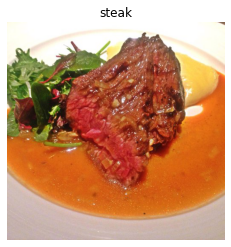

In [9]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#Preprocessing 


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
#load the data from diectories 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#create model with baseline 


In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#create model 
model_4 = Sequential([
        Conv2D(10, 3, input_shape=(224, 224,3)),
        Activation(activation='relu'),
        Conv2D(10,3, activation='relu'),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        Conv2D(10,3, activation='relu'),
        MaxPool2D(), 
        Flatten(),
        Dense(10, activation='softmax') #
])

#compile 
model_4.compile(loss='categorical_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [17]:
#fit the model 
histroy_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 496s 2s/step - loss: 2.2108 - accuracy: 0.1711 - val_loss: 2.0809 - val_accuracy: 0.2500
Epoch 2/5
235/235 [==============================] - 486s 2s/step - loss: 1.9040 - accuracy: 0.3363 - val_loss: 1.9883 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 492s 2s/step - loss: 1.5007 - accuracy: 0.4917 - val_loss: 2.1431 - val_accuracy: 0.2740
Epoch 4/5
235/235 [==============================] - 485s 2s/step - loss: 0.8884 - accuracy: 0.7027 - val_loss: 2.7370 - val_accuracy: 0.2632
Epoch 5/5
235/235 [==============================] - 492s 2s/step - loss: 0.3084 - accuracy: 0.8999 - val_loss: 4.3239 - val_accuracy: 0.2484


In [18]:
model_4.evaluate(test_data)

79/79 [==============================] - 49s 624ms/step - loss: 4.3239 - accuracy: 0.2484


[4.323889255523682, 0.2484000027179718]